<span style="font-family:'Times New Roman', Times, serif; font-size:16px;">

## Question 1

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<span style="font-family:'Times New Roman', Times, serif; font-size:16px;">

### Data Description

| Category          | Variable | 
|--------------------|-----------|
| **Equity Index**   | S&P 500 | 
| **Government Yield** | US Treasury (10-year constant maturity) |
| **Corporate Yield** | ICE BofA US Corporate Index | 
| **Commodity**       | Crude Oil WTI (CL1 Quote) |
| **Forex Rate**      | EUR/USD |


In [93]:
# data import
equity_idx = pd.read_excel('data/SPX Index.xlsx', header=5, usecols=[4, 5], index_col=0, names=['date', 'SPX']).ffill()
equity_idx['log SPX'] = np.log(equity_idx)
equity_idx['log SPX'] = equity_idx['log SPX'].diff()

commodity = pd.read_excel('data/CL1 Comdty.xlsx', header=5, usecols=[5, 6], index_col=0, names=['date', 'Crude Oil WTI']).ffill()
commodity['log Crude Oil WTI'] = np.log(commodity)
commodity['log Crude Oil WTI'] = commodity['log Crude Oil WTI'].diff()

fx_rate = pd.read_excel('data/EURUSD.xlsx', header=1, usecols=[15, 16], index_col=0, names=['date', 'EURUSD']).ffill()
fx_rate['log EURUSD'] = np.log(fx_rate)
fx_rate['log EURUSD'] = fx_rate['log EURUSD'].diff()

gvt_yield = pd.read_excel('data/DGS10.xlsx', sheet_name='Daily', header=0, index_col=0, names=['date', '10yr Tr. Yield']).ffill()
gvt_yield['10yr Tr. return'] = gvt_yield.diff()

corporate_yield = pd.read_excel('data/BAMLC0A0CMEY.xlsx', sheet_name='Daily, Close', header=0, index_col=0, names=['date', 'US Corp Yields']).ffill()
corporate_yield['US Corp return'] = corporate_yield.diff()

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [96]:
# aggregation
df = pd.concat([equity_idx, gvt_yield, corporate_yield, commodity, fx_rate], join='inner', axis=1)
df['spread'] = [(df['US Corp Yields'].iloc[i] - df['10yr Tr. Yield'].iloc[i]) for i in range(df.shape[0])]
df['spread return'] = df['spread'].diff()
df = df.dropna(axis=0).reset_index()


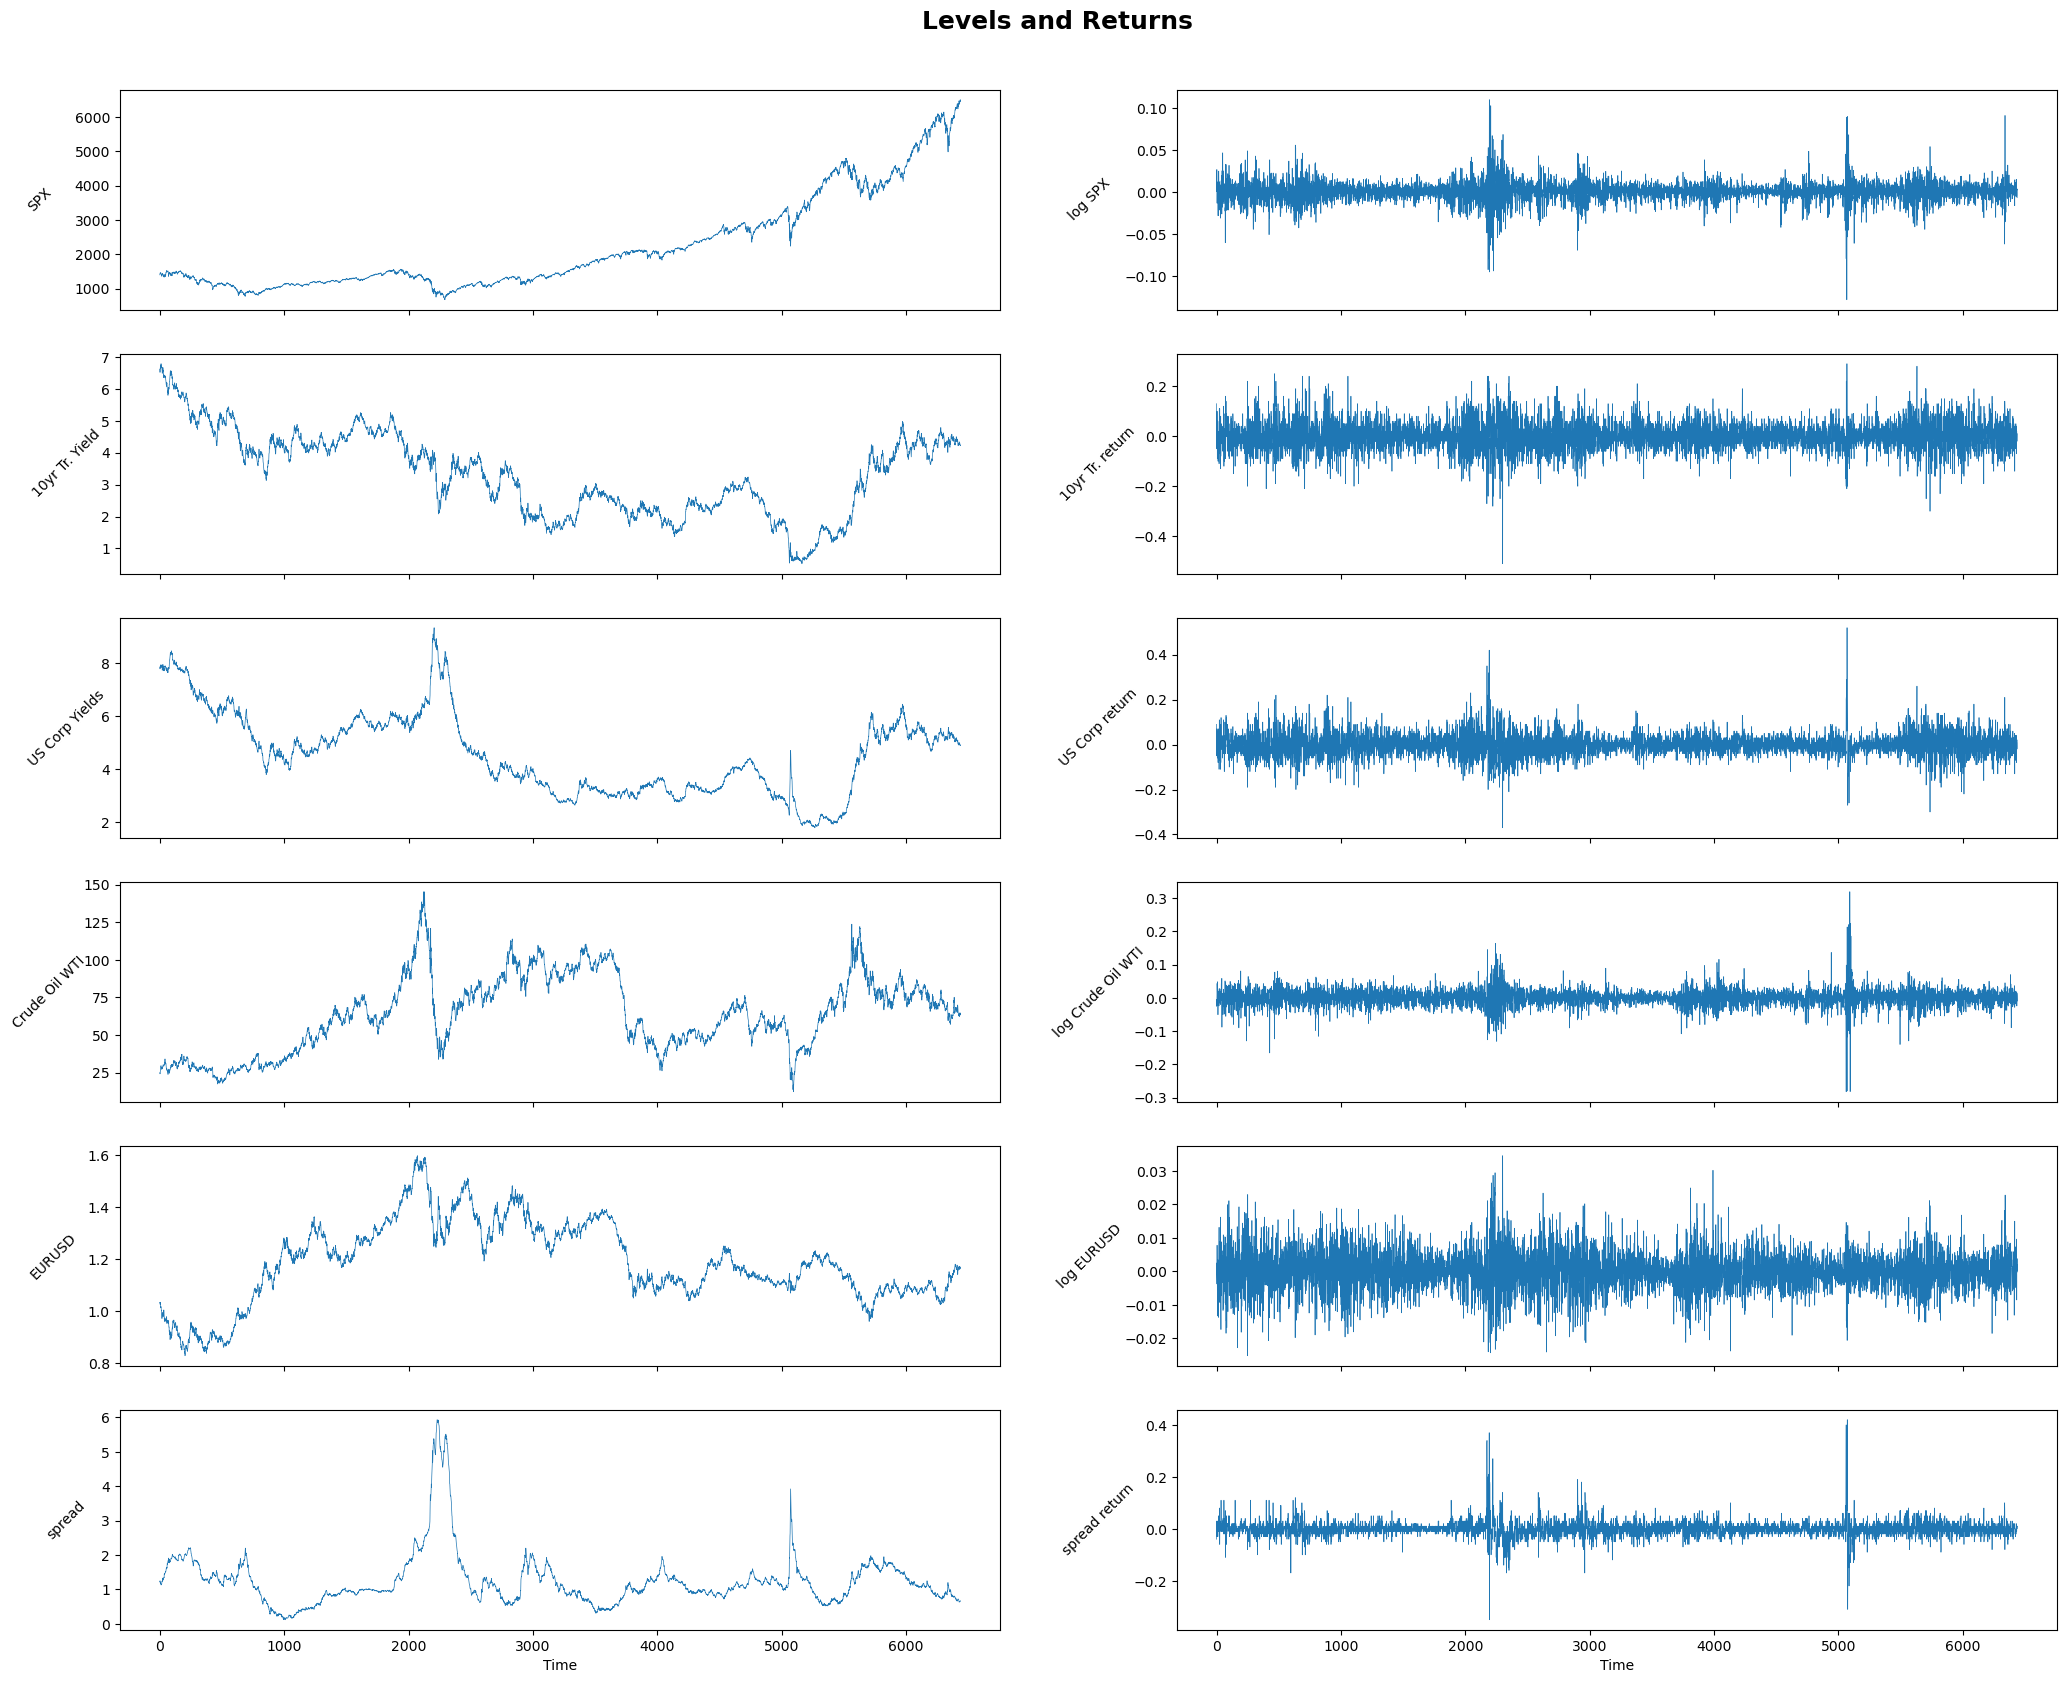

In [112]:
# Plot
names_col = df.columns.to_list()                                            # Subplots names 
nrows = 6                                               
ncols = 2
lw = .5
fig, axs = plt.subplots(nrows, ncols, sharex=True, figsize=(25, 20))        # Plot Settings
plt.suptitle('Levels and Returns', y=0.92, fontsize=18, fontweight='bold')                                          # Plot Title
axs[-1, 0].set_xlabel('Time')                                               # Plot common X-axis name
axs[-1, 1].set_xlabel('Time')                                               # Plot common X-axis name

column = 1                                                                 # Index for plotting each column
for i in range(nrows):
    axs[i, 0].plot(df.index, df.iloc[:, column], linewidth=lw)              # first-column subplot (Level)
    axs[i, 0].set_ylabel(f'{names_col[column]}', rotation=45, labelpad=25, va='center')                             # first subplot Y Label

    axs[i, 1].plot(df.index, df.iloc[:, column+1], linewidth=lw)            # second-column plot (Return)
    axs[i, 1].set_ylabel(f'{names_col[column+1]}', rotation=45, labelpad=25, va='center')                           # second subplot Y Label
    
    column += 2

plt.show()

In [ ]:
returns_df = df.copy()
returns_df = df.drop(['SPX', '10yr Tr. Yield', 'US Corp Yields', ])
descriptive_stats = df.describe()
k_moments = pd.DataFrame()
for i in names_col:
    k_moments[i] = [df[i]]
# descriptive_stats = pd.concat([descriptive_stats, skew.T, kurtosis.T], axis=0)

,date,SPX,log SPX,10yr Tr. Yield,10yr Tr. return,US Corp Yields,US Corp return,Crude Oil WTI,log Crude Oil WTI,EURUSD,log EURUSD,spread,spread return
count,6438,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000
mean,2012-11-07 00:47:51.947810048,2212.221376,0.000234,3.307801,-0.000351,4.556440,-0.000614,63.867414,0.000227,1.187846,0.000032,1.248639,-0.000104
min,2000-01-05 00:00:00,676.530000,-0.127652,0.520000,-0.510000,1.790000,-0.370000,12.340000,-0.282206,0.827200,-0.025218,0.120000,-0.350000
25%,2006-06-19 06:00:00,1207.365000,-0.004787,2.230000,-0.030000,3.272500,-0.030000,44.662500,-0.012827,1.088425,-0.003351,0.850000,-0.010000
50%,2012-11-07 12:00:00,1515.805000,0.000622,3.380000,0.000000,4.500000,0.000000,63.285000,0.001071,1.177250,0.000074,1.100000,0.000000
75%,2019-04-02 18:00:00,2845.730000,0.005914,4.300000,0.030000,5.607500,0.030000,81.670000,0.013593,1.304775,0.003384,1.450000,0.010000
max,2025-08-29 00:00:00,6501.860000,0.109572,6.790000,0.290000,9.320000,0.520000,145.290000,0.319634,1.599100,0.034506,5.930000,0.420000
std,NaN,1370.734922,0.012252,1.298000,0.058044,1.528736,0.051250,25.020650,0.025907,0.155110,0.005877,0.792928,0.030629


In [101]:
description

,SPX,log SPX,10yr Tr. Yield,10yr Tr. return,US Corp Yields,US Corp return,Crude Oil WTI,log Crude Oil WTI,EURUSD,log EURUSD,spread,spread return
count,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000
mean,2212.221376,0.000234,3.307801,-0.000351,4.556440,-0.000614,63.867414,0.000227,1.187846,0.000032,1.248639,-0.000104
std,1370.734922,0.012252,1.298000,0.058044,1.528736,0.051250,25.020650,0.025907,0.155110,0.005877,0.792928,0.030629
min,676.530000,-0.127652,0.520000,-0.510000,1.790000,-0.370000,12.340000,-0.282206,0.827200,-0.025218,0.120000,-0.350000
25%,1207.365000,-0.004787,2.230000,-0.030000,3.272500,-0.030000,44.662500,-0.012827,1.088425,-0.003351,0.850000,-0.010000
50%,1515.805000,0.000622,3.380000,0.000000,4.500000,0.000000,63.285000,0.001071,1.177250,0.000074,1.100000,0.000000
75%,2845.730000,0.005914,4.300000,0.030000,5.607500,0.030000,81.670000,0.013593,1.304775,0.003384,1.450000,0.010000
max,6501.860000,0.109572,6.790000,0.290000,9.320000,0.520000,145.290000,0.319634,1.599100,0.034506,5.930000,0.420000


,Crude Oil WTI,log Crude Oil WTI
date,,
2000-01-04,25.55,NaN
2000-01-05,24.91,-0.025368
2000-01-06,24.78,-0.005232
2000-01-07,24.22,-0.022858
2000-01-10,24.67,0.018409
...,...,...
2025-08-25,64.80,0.017749
2025-08-26,63.25,-0.024210
2025-08-27,64.15,0.014129
